# Drawing lines

In [111]:
#Import libraries

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString

%matplotlib inline

In [112]:
#Loading data
df = pd.read_csv('gannettfinal3.csv')
#Fixing a few quirks
df["long"] = df["long"].replace("--83.051092","-83.051092")
df["lat"] = df["lat"].replace("42.330063,","42.330063")

In [113]:
df.dtypes

Unnamed: 0        int64
Source           object
content_lat     float64
content_long    float64
lat              object
long             object
dtype: object

In [114]:
#Converting
df["long"] = df["long"].astype(float)
df["lat"] = df["lat"].astype(float)

In [115]:
df2 = df

## Drawing lines with Shapely

In [116]:
geometries = df.apply(lambda z: LineString([[z.long, z.lat], [z.content_long, z.content_lat]]), axis=1)
lines = gpd.GeoDataFrame(df, geometry=geometries)
lines.crs = {'init' :'epsg:4326'}
lines.head()

,Unnamed: 0,Source,content_lat,content_long,lat,long,geometry
0,0,northjersey,40.717688,-74.396332,40.825809,-74.106984,"LINESTRING (-74.106984 40.825809, -74.39633179..."
1,1,courier-journal,38.376584,-85.148985,38.261129,-85.811337,"LINESTRING (-85.81133699999999 38.261129, -85...."
2,2,azcentral,38.378621,-84.712673,33.451799,-112.070826,"LINESTRING (-112.070826 33.451799, -84.7126732..."
3,3,knoxnews,36.372158,-84.559004,36.007618,-84.263913,"LINESTRING (-84.2639131 36.0076185, -84.559003..."
4,4,desmoinesregister,41.355706,-92.285966,41.586833,-93.627206,"LINESTRING (-93.6272063 41.5868329, -92.285966..."


In [117]:
df = pd.read_csv('gannettfinal3.csv')
points = df2.apply(lambda z: Point(z.long, z.lat), axis=1)
newspapers = gpd.GeoDataFrame(df, geometry=points)
newspapers.crs = {'init' :'epsg:4326'}
newspapers.head()

,Unnamed: 0,Source,content_lat,content_long,lat,long,geometry
0,0,northjersey,40.717688,-74.396332,40.825809,-74.106984,POINT (-74.106984 40.825809)
1,1,courier-journal,38.376584,-85.148985,38.261129,-85.811337,POINT (-85.81133699999999 38.261129)
2,2,azcentral,38.378621,-84.712673,33.451799,-112.070826,POINT (-112.070826 33.451799)
3,3,knoxnews,36.372158,-84.559004,36.0076185,-84.2639131,POINT (-84.2639131 36.0076185)
4,4,desmoinesregister,41.355706,-92.285966,41.5868329,-93.6272063,POINT (-93.6272063 41.5868329)


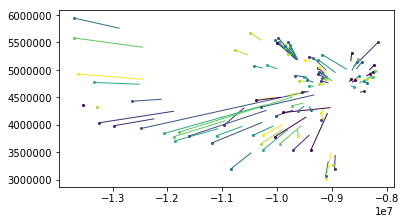

In [118]:
ax = lines.to_crs({'proj': 'merc'}).plot()
newspapers.to_crs({'proj': 'merc'}).plot(ax=ax)

In [119]:
states = gpd.read_file("/Users/laurentbastien/Desktop/home/soma/class-14/cb_2016_us_state_500k/cb_2016_us_state_500k.shp")

In [120]:
#Bringing in U.S coordinates
from shapely.geometry import Polygon

bounds = [
            [
              -128.408203125,
              23.563987128451217
            ],
            [
              -66.005859375,
              23.563987128451217
            ],
            [
              -66.005859375,
              50.62507306341435
            ],
            [
              -128.408203125,
              50.62507306341435
            ],
            [
              -128.408203125,
              23.563987128451217
            ]]

# Turn the coordinates into a shapely polygon
northeast_box = Polygon(bounds)


states.to_crs({'init': 'epsg:4326'}).within(northeast_box).head(10)

0     True
1    False
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
dtype: bool

In [121]:
continental = states[states.to_crs({'init': 'epsg:4326'}).within(northeast_box)]

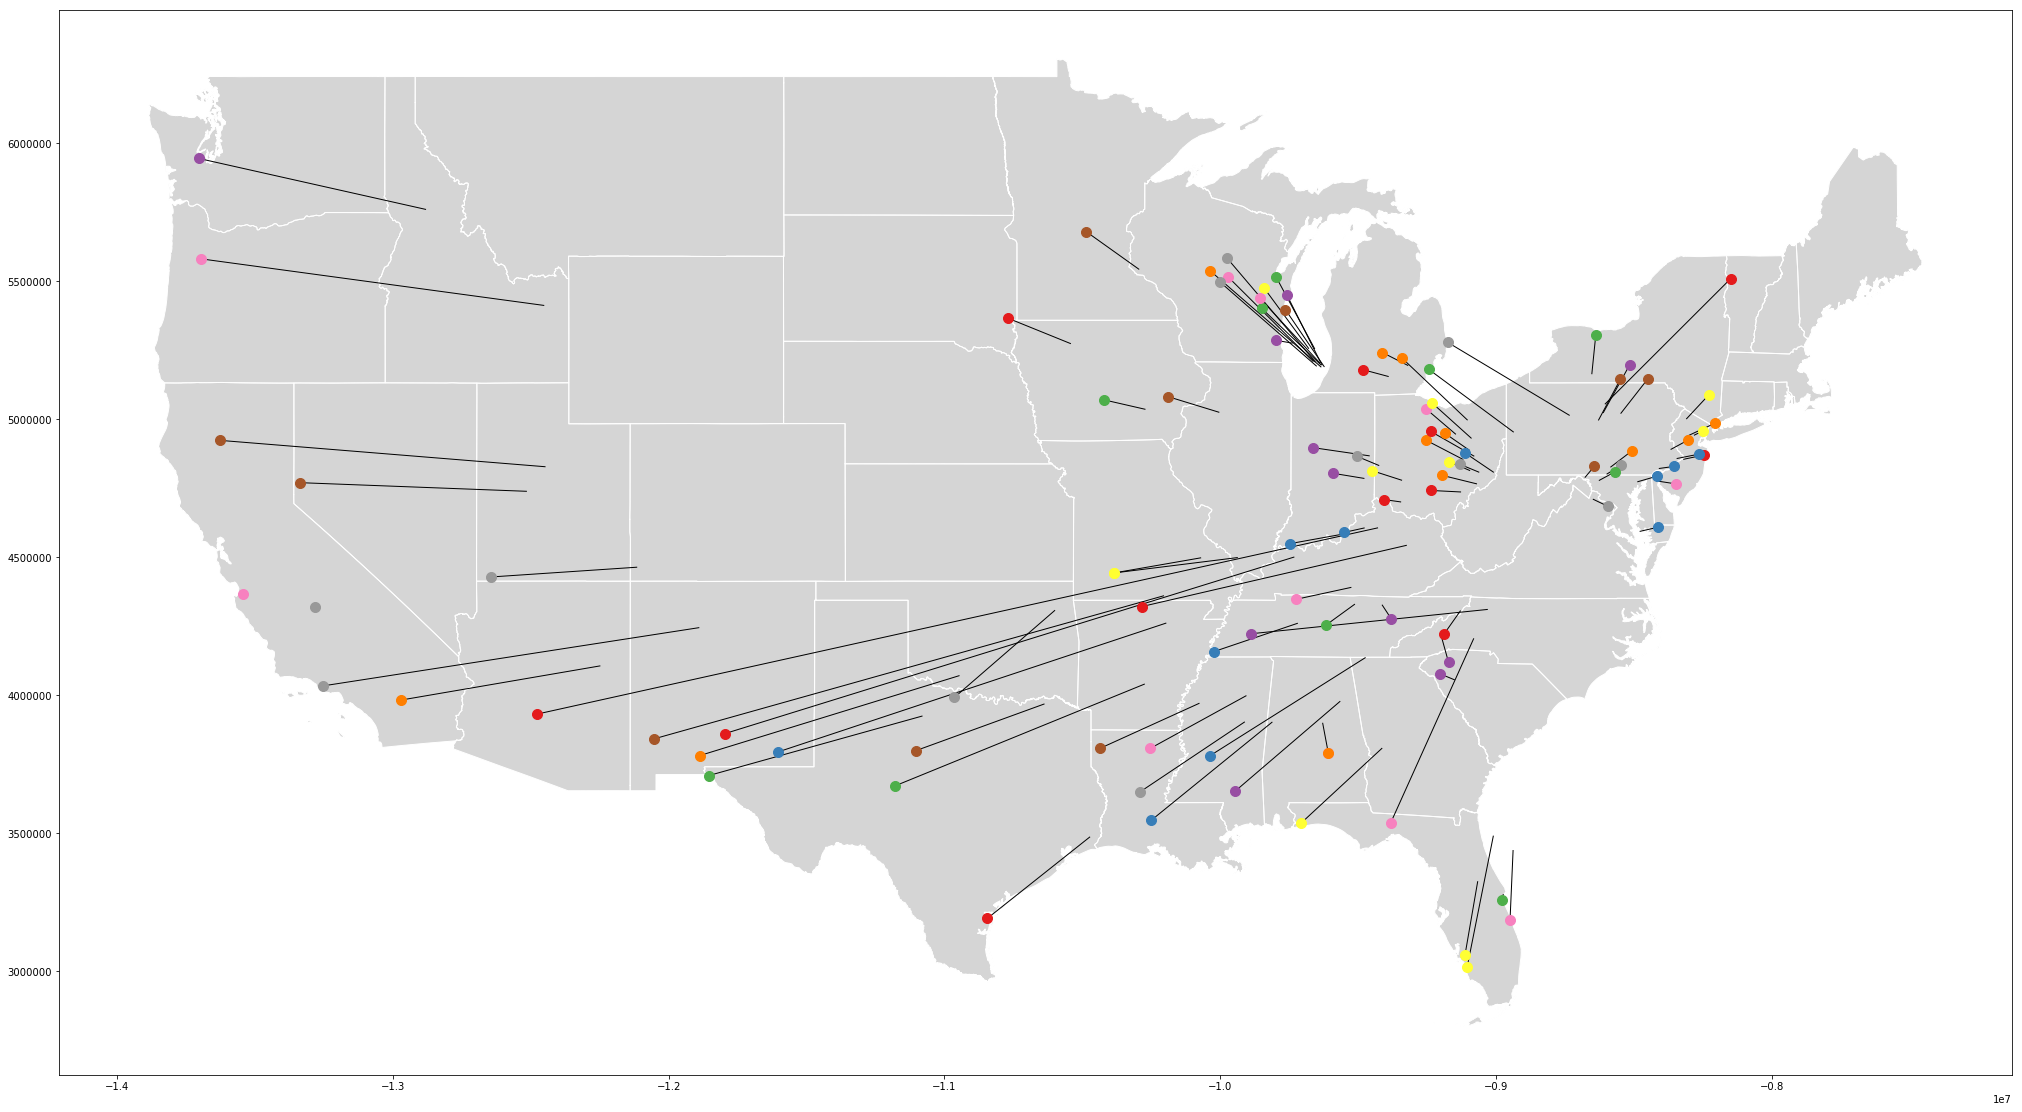

In [135]:
ax = continental.to_crs({"proj":"merc"}).plot(color='#ADADAD',edgecolor='white', figsize=(35,35))
lines.to_crs({'proj': 'merc'}).plot(ax = ax, color="black")
newspapers.to_crs({'proj': 'merc'}).plot(column= "Source", markersize=10, ax=ax)

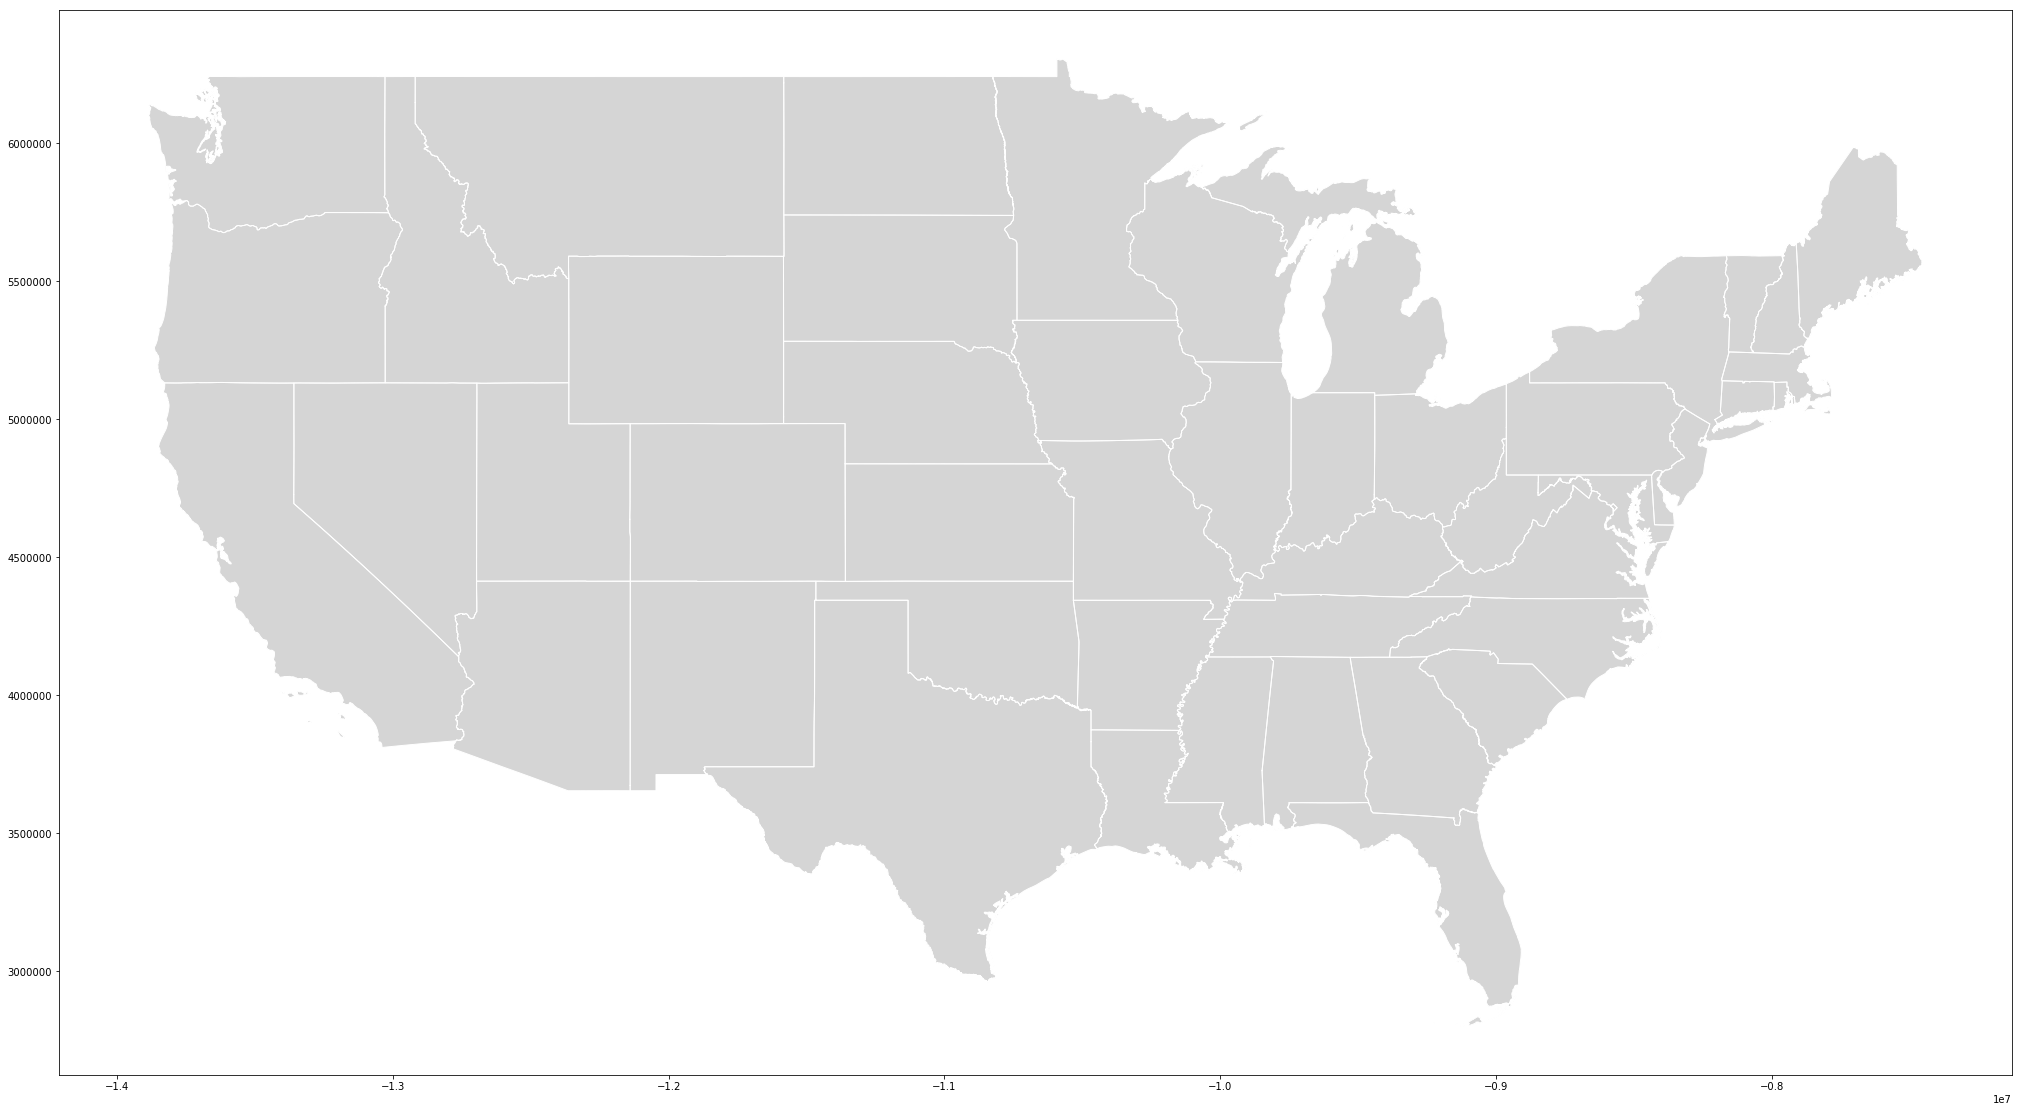

In [136]:
continental.to_crs({"proj":"merc"}).plot(color='#ADADAD',edgecolor='white', figsize=(35,35))

In [100]:
lines

,Unnamed: 0,Source,content_lat,content_long,lat,long,geometry
0,0,northjersey,40.717688,-74.396332,40.825809,-74.106984,"LINESTRING (-74.106984 40.825809, -74.39633179..."
1,1,courier-journal,38.351211,-84.792339,38.192391,-84.874981,"LINESTRING (-84.8749809 38.1923907, -84.792339..."
2,2,azcentral,38.378605,-84.712618,33.451799,-112.070826,"LINESTRING (-112.070826 33.451799, -84.7126180..."
3,3,knoxnews,36.372158,-84.559004,36.007618,-84.263913,"LINESTRING (-84.2639131 36.0076185, -84.559003..."
4,4,desmoinesregister,41.355706,-92.285966,41.586833,-93.627206,"LINESTRING (-93.6272063 41.5868329, -92.285966..."
5,5,cincinnati,39.042114,-83.961221,39.103118,-84.512020,"LINESTRING (-84.5120196 39.1031182, -83.961220..."
6,6,app,40.116578,-74.743826,40.221464,-74.087498,"LINESTRING (-74.0874979 40.2214636, -74.743825..."
7,7,indystar,39.637141,-85.156404,39.764509,-86.158492,"LINESTRING (-86.15849230000001 39.7645091, -85..."
8,8,postcrescent,42.832683,-86.958941,44.263357,-88.409030,"LINESTRING (-88.4090303 44.2633574, -86.958940..."
9,9,mycentraljersey,40.365717,-75.155372,40.593160,-74.604565,"LINESTRING (-74.60456499999999 40.59316, -75.1..."


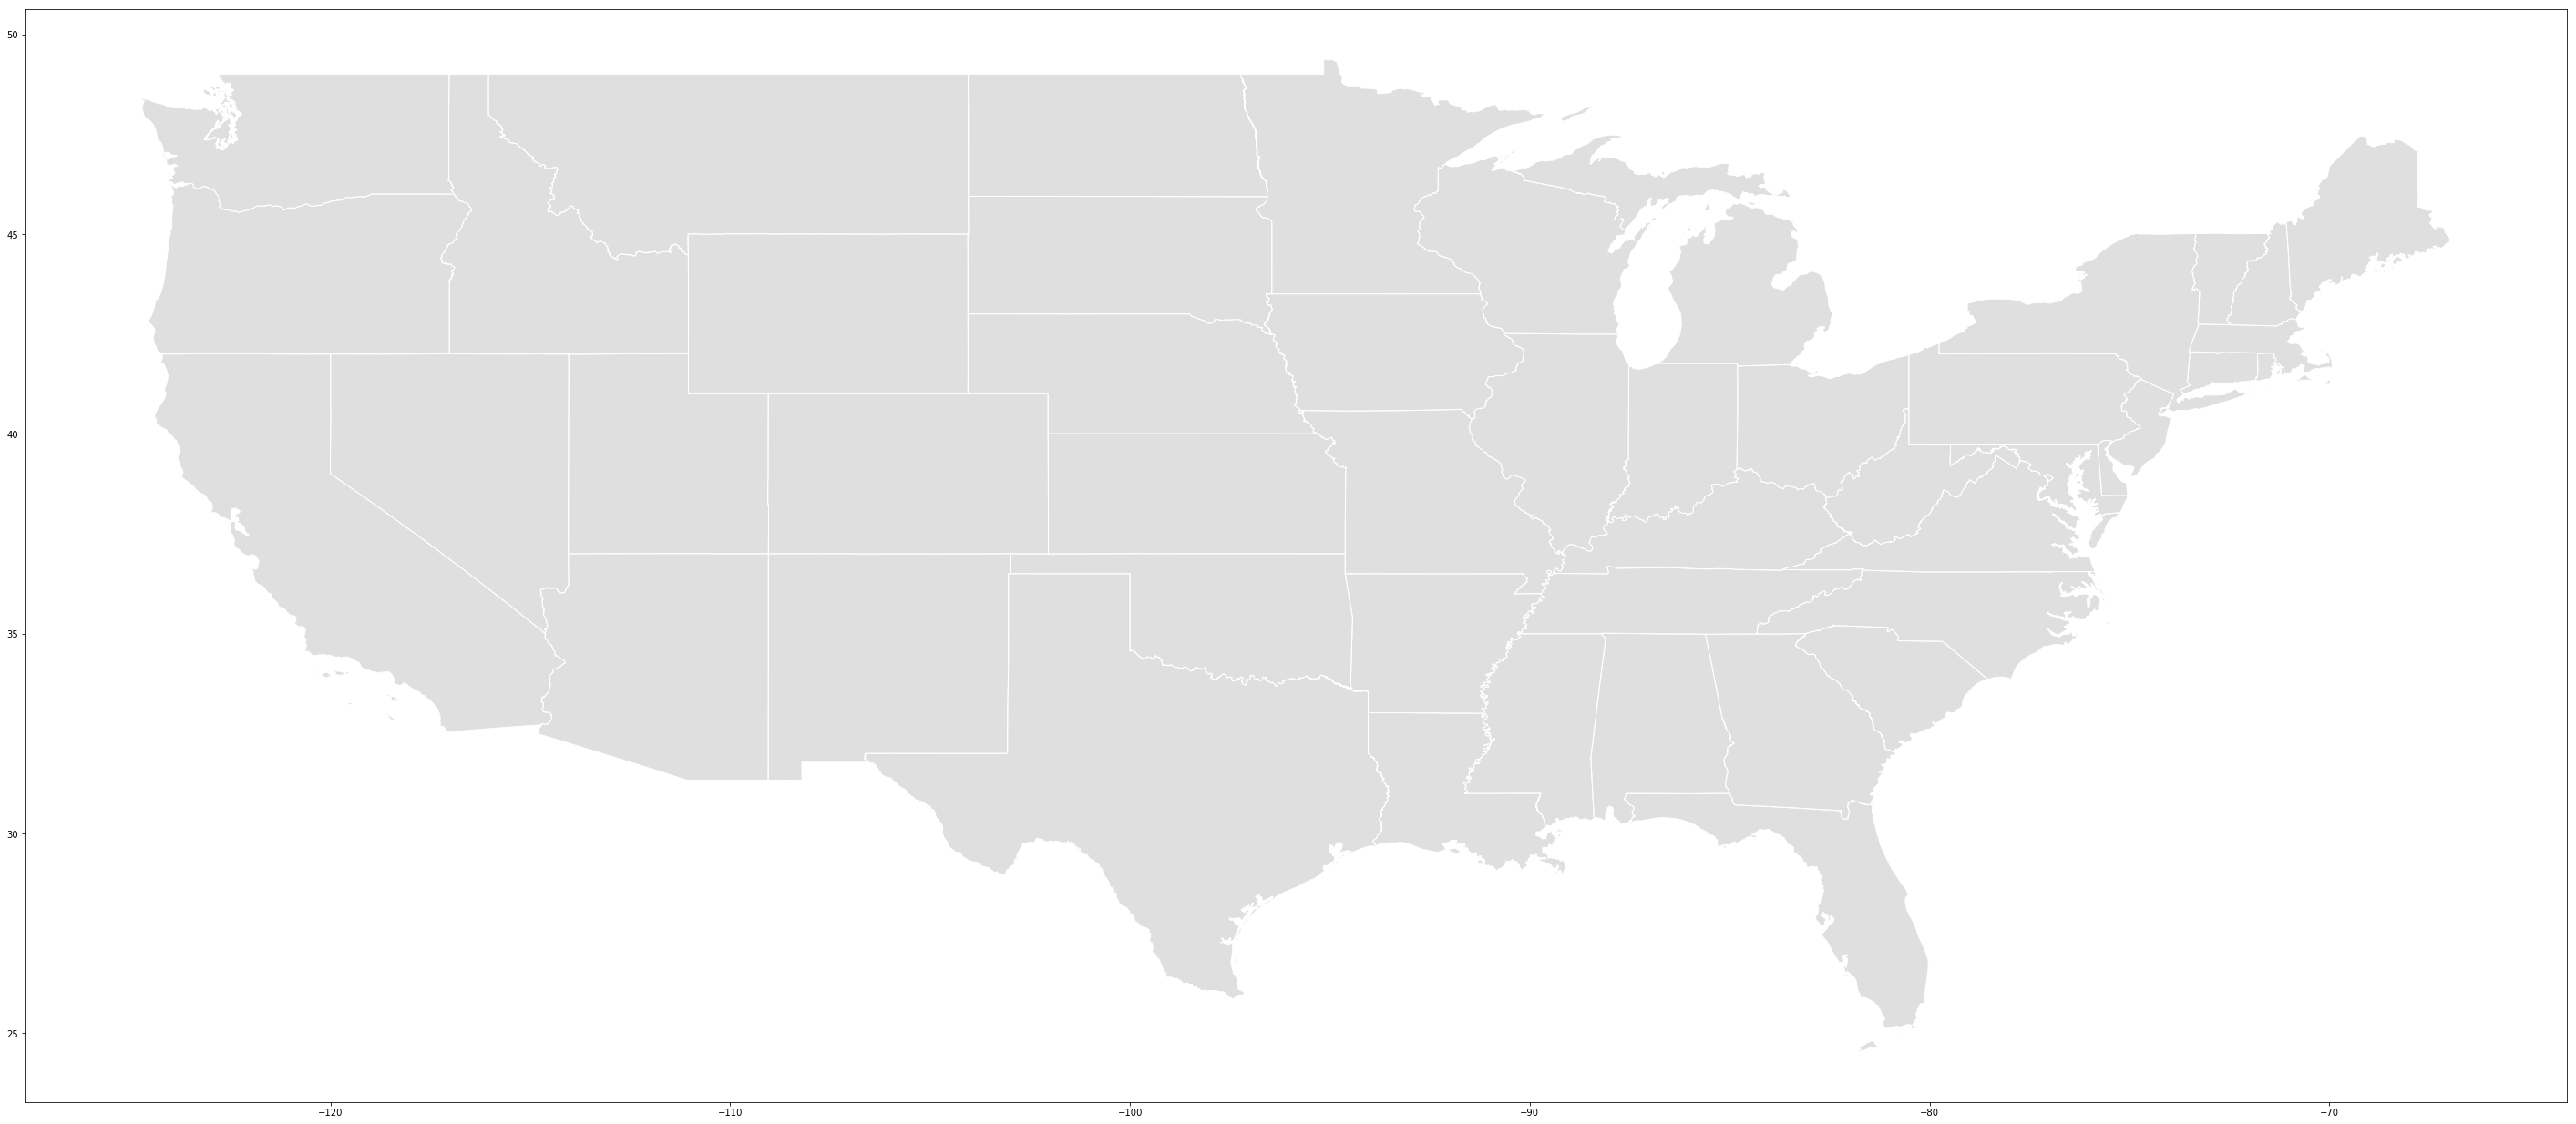

In [124]:
continental.plot(color='#C0C0C0',edgecolor='white', figsize=(50,50))